## Instructions {-}
Ce sujet est constitué de deux parties : la partie 1 correspond au sujet donné l'an dernier, dont la correction vous est donnée, la partie 2 constitue la partie qui sera évaluée et se place dans la continuité de la partie 1.

# Enoncé du problème (Partie 1)

L'objectif de ce projet est d'estimer la longueur de câble sous-marin nécessaire pour relier deux côtes $A$ et $B$  en utilisant des simulations conditionnelles.


Le câble reposera sur le fond marin dont la profondeur est inconnue.
Le segment $[AB]$ est discrétisé par une séquence de (N+1) points. On pose $x_0=A$ et pour $i=1,\dots,N$, $$x_i=x_0+i\Delta$$ où $$\Delta = \frac{AB}{N}$$ de telle sorte que $x_N=B$.
On note $z(x)$ la profondeur du fond marin au point $x$ de telle sorte 
qu'on pourra estimer la longueur totale de câble nécessaire par la somme 
des longueurs sur les segments de la discrétisation :

$$l=\sum_{i=1}^N\sqrt{\Delta^2+(z(x_i)-z(x_{i-1}))^2}.$$

Enfin, notons que l'on dispose d'un ensemble de $n$ observations de la 
profondeur que l'on supposera situées sur des points de discrétisation $z(x_{j_1}),\dots,z(x_{j_n})$.


On adopte un modèle probabiliste pour la profondeur. On suppose que le vecteur des 
profondeurs sur les points de discrétisation 
$\mathbf{z}=(z(x_0),\dots,z(x_N))$ est la réalisation
d'un vecteur aléatoire gaussien $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$ 
dont le vecteur d'espérance ne contient qu'une seule valeur $\mu$ 
répétée $N+1$ fois et dont la matrice de covariance $\Sigma$ a pour termes $\sigma_{ij}$
définis par $\sigma_{ij}=C(|x_i-x_j|)$ où $C$ est une
fonction décroissante, traduisant le fait que deux points 
géographiquement proches ont tendance à avoir des profondeurs plus similaires que deux points éloignés.

On supposera que la matrice de covariance ainsi 
générée est définie-positive (en fait, $C$ sera choisie parmi les fonctions qui, 
appliquées aux termes d'une matrice de distance, produisent des matrices définie-positives). 

Si on note $L$ la variable aléatoire donnant la longueur de cable nécessaire : 
$$L=\sum_{i=1}^N\sqrt{\Delta^2+(Z(x_i)-Z(x_{i-1}))^2},$$
un bon estimateur de $L$ est fourni par l'espérance conditionnelle 

$$L^\star=E[L|Z(x_{j_1})=z(x_{j_1}),\dots,Z(x_{j_n})=z(x_{j_n})].$$
                                                                              
Cependant, cette quantité est difficilement accessible par le calcul. 
On va donc avoir recours à des
simulations conditionnelles. C'est-à-dire que l'on va simuler 
un nombre $K$ de réalités (disons des réalisations du modèle 
probabiliste choisi), et sur chacune d'entre elle, 
la quantité de câble nécessaire sera évaluée. 
On disposera ainsi d'un échantillon $l_{(1)},\dots,l_{(K)}$ de 
longueures simulées. Puis on approchera l'espérance conditionnelle  par 
$$L^\star=\frac1{K}\sum_{k=1}^K l_{(k)}.$$

L'objectif de ce projet est donc d'écrire un code permettant 
d'effectuer cette simulation conditionnelle, puis de l'appliquer 
au jeu de données fourni et d'en déduire une estimation de la longueur de câble nécessaire.

## Questions théoriques

1. Quel théorème du cours nous autorise-t-il à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles ?

*la loi forte des grands nombres, cf [Proba IV p.16](https://boisgera.github.io/CDIS/output/Probabilit%C3%A9%20IV.pdf), en vérifiant que $L$ est bien intégrable*

2. Rappeler la loi conditionnelle du vecteur des composantes de $\mathbf{Z}$ correspondant aux points de discrétisation
sans observation, connaissant les valeurs prises par les composantes aux sites d'observation.

*cf. [Proba III p.18](https://boisgera.github.io/CDIS/output/Probabilit%C3%A9%20III.pdf),*

3. Si $\mathbf{Y}=(Y_1,\dots,Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1, 
quelle est la loi du vecteur $\mathbf{Z}=m+R\mathbf{Y}$ où $R$ est une matrice $p\times p$ et $m$ est un vecteur de taille $p$ ?

*cf. [Proba V p.12](https://cloud.mines-paristech.fr/index.php/s/GLDwtTAMOJCYk3i/download)*

4. En déduire un algorithme de simulation conditionnelle.

*Appliquer l'algorithme de la q.3 à la loi conditionnelle (on calculera en particulier l'espérance conditionnelle de $\mathbf{Z}$ sachant les données et la décomposition de Cholesky de la matrice de covariance conditionnelle sachant les données).*

## Données du problème
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les données $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'espérance de chaque composante du vecteur aléatoire $\mathbf{Z}$ est donnée par $\mu=-5.$

La fonction $C$ est définie par $$C(h)=\sigma^2 e^{-|h|/a},$$

où $|h|$ correspond à la distance entre deux points, $a=50$ et $\sigma^2=12$.


## Implémentation

### Préambule

In [2]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))

### Questions

1. Ecrire une fonction qui prend en argument la distance entre les points, le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points.
On pourra fournir une matrice de distance à cette fonction. Dans ce cas, la fonction renverra la matrice de covariance.

In [3]:
#Fonction C

def Covexp(dist,rangeval,sigmaval):
    return sigmaval * np.exp(-dist/rangeval)


2. Calculer la matrice de distance.

In [4]:
distmat=abs(np.subtract.outer(discretization,discretization))

3. Calculer la matrice de covariance du vecteur $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$.

In [5]:
Sigma=Covexp(distmat,a,sigma2)

4. Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues


In [6]:
SigmaObs = Sigma[observation_indexes,:][:,observation_indexes]
SigmaObsUnknown = Sigma[observation_indexes,:][:,unknown_indexes]
SigmaUnknown = Sigma[unknown_indexes,:][:,unknown_indexes]

5. Calculer l'espérance conditionnelle des composantes non observées connaissant les observations et la représenter avec les données.

In [7]:
invSigma = np.linalg.inv(SigmaObs) 
Ec= mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))

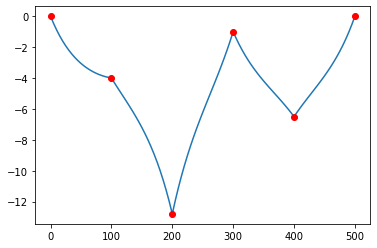

In [8]:
allval1 = np.zeros(N)
allval1[unknown_indexes]=Ec
allval1[observation_indexes]=depth
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

6. Calculer la matrice de variance conditionnelle et tracer sa diagonale (variance conditionnelle) en fonction de la position. Commenter.

In [9]:
SigmaCond = SigmaUnknown - np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),SigmaObsUnknown))

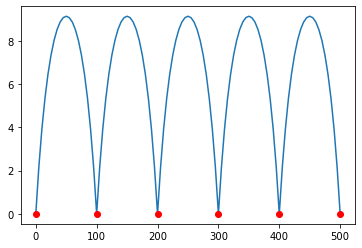

In [10]:
allval2 = np.zeros(N)
allval2[unknown_indexes]=np.diag(SigmaCond)
plt.plot(discretization,allval2)
plt.plot(discretization[observation_indexes], np.zeros(np.shape(observation_indexes)[0]), 'ro')
plt.show()

*On voit ici que la variance est nulle aux points de données (puisque la valeur est fixée) puis qu'elle augmente lorsqu'on s'éloigne des données*

7. Effectuer une simulation conditionnelle. Sur un même graphique, tracer la simulation ainsi que les données et l'espérance conditionnelle. Commenter.

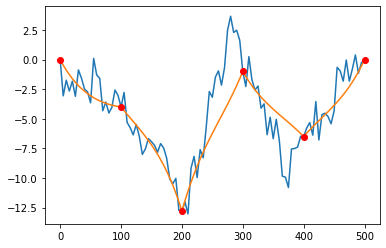

In [11]:
Cholesky = np.linalg.cholesky(SigmaCond)
x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu = Ec + np.matmul(Cholesky,x)

allval3 = np.zeros(N)
allval3[unknown_indexes]=simu
allval3[observation_indexes]=depth
plt.plot(discretization,allval3)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

*l'espérance conditionnelle est lisse car c'est la fonction des données qui minimise la variance ; la simulation conditionnelle reproduit les fluctuations du modèle et donc l'aspect du fond marin*

8. Ecrire une fonction qui calcule la longueur du câble en fonction du vecteur des profondeurs et du pas de discrétisation.

In [12]:
def length(z,delta):
    return sum(np.sqrt(Delta**2+(z[1:N]-z[0:-1])**2))

9. Utiliser cette fonction pour calculer la longueur du câble à partir de 100 simulations. Comparer l'espérance conditionnelle (estimée) de la longueur avec la longueur de l'espérance conditionnelle.

In [13]:
K=100000
result = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result[i]=length(allval3,Delta)
    
print(sum(result)/K)
print(length(allval1,Delta))


522.4353412986485
501.6468416918411


*On donne ici directement les résultats pour 100000 simulations (comparer la vitesse d'éxécution avec votre code pour voir l'intérêt de la vectorisation).*

*On voit ici que la longueur donnée par l'espérance conditionnelle est bien moindre que la longueur d'une simulation conditionnelle. Ceci est dû au fait que la simulation conditionnelle va reproduire les fluctuations attendues, au contraire de l'espérance conditionnelle qui minimise la variance.*

*NB : On remarquera que c'est le seul endroit où on a utilisé une boucle dans cette correction. On aurait pu s'en passer en utilisant notamment les outils de la librairie Pandas mais le code est plus lisible ainsi.*

10. Représenter la suite $M_n$ des moyennes des longueurs de câbles en fonction du nombre de simulations. Commenter.

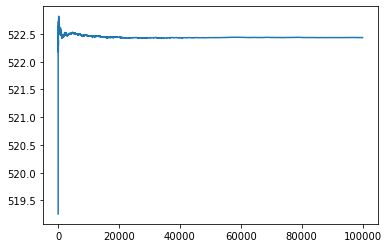

In [14]:
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result)/indice_simu)
plt.show()

*Comme attendu d'après la LFGN, on observe une stabilisation de la valeur moyenne. Les variations sont imperceptibles après quelques dizaines de milliers de simulations*

11. Représenter l'histogramme des longueurs de câbles générées.

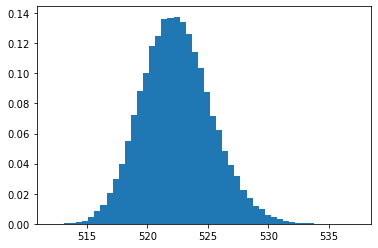

In [15]:
plt.hist(result,50,density=True)
plt.show()

*L'histogramme ressemble à une densité gaussienne, avec néanmoins une légère dissymétrie (plus de valeurs fortes).*

12. Donner un intervalle de confiance à 95% de la longueur du câble par 2 méthodes différentes. Commenter.

*1ère méthode : par approximation gaussienne. L'histogramme précédent suggère qu'une loi gaussienne peut bien représenter la loi conditionnelle de la longueur du cable. On obtient un intervalle de confiance en calculant la moyenne (milieu de l'intervalle) et l'écart type de l'échantillon de longueurs de câble puis en appliquant la formule du cours.*

In [16]:
Ln = sum(result)/K
sigman = np.std(result)
[Ln - sigman*1.96,Ln + sigman*1.96]

[516.7910559815871, 528.0796266157099]

*2e méthode : on extrait les quantiles à 2.5% et 97.5% de l'échantillon, c'est-à-dire les valeurs $x_\alpha$ pour $\alpha \in \{0.025 ; 0.975\}$telles que* $$\mathbb{P}(L<x_\alpha) \approx \frac{1}{n}\sum_{i=1}^N 1_{\{L_i<x_\alpha\}}$$

In [17]:
np.quantile(result,[0.025,0.975])

array([517.14057575, 528.42114026])

*ATTENTION : ici l'utilisation du TCL tel qu'exposé au début du chapitre 5 fournissait un intervalle de confiance de l'**espérance de la longueur de câble** et non de la **longueur de câble** (erreur fréquente).*

*On voit par ailleurs que la 2e méthode est plus précise car elle est basée directement sur la loi empirique de l'échantillon*

13. Donner une estimation de la probabilité que la longueur du câble dépasse 525 m.

In [18]:
np.mean(result>525)

0.18368

14. Reprendre les questions précédentes avec 1000, 10000 puis 100000 simulations. Commenter

*cf. le commentaire de la question 10. On observe une stabilisation progressive des estimateurs des différentes quantités calculées : moyennes, quantiles, probabilité de dépassement de seuil.*

# Enoncé 2021 (Partie 2)

Nous nous plaçons dans le même cadre que ci-dessus. Nous tenons pour acquis les résultats précédents et allons maintenant approfondir l'analyse.

## Valeurs positives

1. A la question 7 de la partie 1, on peut s'apercevoir que certains profils de profondeur présentent des valeurs positives, ce qui n'a pas de sens si on considère qu'il n'y a pas de partie émergée entre les deux côtes. Proposer et implémenter un algorithme de type rejet qui ne génèrera que des valeurs négatives. Représenter un profil de profondeur généré.

On rejette tous les vecteurs qui ne sont pas entièrement négatifs, c'est-à-dire pour lesquels il existe au moins une coordonnée qui est strictement positive.

On stocke pour le calcul du taux de rejet à la question suivante le nombre de vecteurs rejetés.

In [19]:
# Initialisation du module aléatoire

np.random.seed(1234)

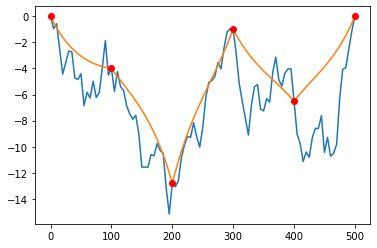

In [20]:
essais_i = []

# Génération aléatoire d'un vecteur suivant la loi conditionnelle de la partie précédente
def get_simu_ini(Cholesky):
    x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu = Ec + np.matmul(Cholesky,x)
    return simu

# Fonction qui ne génère que des profils sans partie émergée entre les deux côtes.
# Le paramètre fill indique si le vecteur obtenu doit être ensuite complété avec les valeurs connues.
# L'algorithme utilise des variables définies à la partie précédente (SigmaCond...)
def valeurs_pos(fill=True):
    Cholesky = np.linalg.cholesky(SigmaCond)
    simu = get_simu_ini(Cholesky)
    i = 0
    
    while np.any(simu > 0):
        simu = get_simu_ini(Cholesky)
        i += 1
    
    essais_i.append(i)
        
    if (fill):
        allval3 = np.zeros(N)
        allval3[unknown_indexes]=simu
        allval3[observation_indexes]=depth        
        return allval3
    else:
        return simu

plt.plot(discretization, valeurs_pos())
plt.plot(discretization, allval1) # Profil moyen (cf Q5)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

# toujours sous l'espérance

2. L'emploi de cet algorithme a-t-il un impact sur la valeur moyenne de la longueur de câble ? Sur l'histogramme des longueurs de câble ? Sur l'intervalle de confiance obtenu par la méthode des quantiles ? Sur la probabilité de dépassement du seuil de 525 m? Donner une estimation du taux de rejet de l'algorithme. Considérer 10000 simulations.

On utilise une méthode similaire à la partie précédente pour réaliser les 10 000 simulations et observer les modifications dû à l'emploi de cet algorithme.

On recalcule également sans l'algorithme de rejet pour comparer plus facilement.

La cellule peut mettre quelques secondes à s'exécuter.

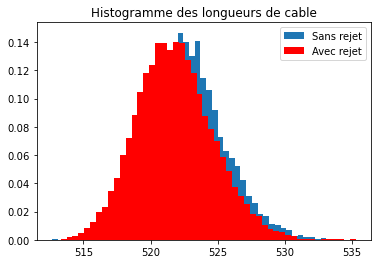

Moyenne (sans rejet, avec rejet) 
	 522.471492619288 521.7958238123985
Ecart-type (sans rejet, avec rejet) 
	 2.8890131782945256 2.8565517371326403
Intervalle de confiance (sans rejet, avec rejet) 
	 [517.17949754 528.57403985] [516.5011172  527.81665731]
Proba (sans rejet, avec rejet) 
	 0.1827 0.1333
Taux de rejet 
	 0.9620720127332651


In [24]:
K=10000

# SANS rejet
result = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result[i]=length(allval3,Delta)
    
Ln = sum(result)/K
sigman = np.std(result)
ic = np.quantile(result,[0.025,0.975])
pm = np.mean(result>525)
plt.hist(result,50,density=True, label='Sans rejet')
plt.title('Sans rejet')
#plt.show()

# AVEC REJET
result = np.zeros(K)
for i in range(K):
    allval3[unknown_indexes]=valeurs_pos(False)
    result[i]=length(allval3,Delta)
Ln2 = sum(result)/K
sigman2 = np.std(result)
ic2 = np.quantile(result,[0.025,0.975])
pm2 = np.mean(result>525)
plt.hist(result,50,density=True, color='red', label='Avec rejet')
plt.title('Histogramme des longueurs de cable')
plt.legend()
plt.show()

print("Moyenne (sans rejet, avec rejet)", "\n\t", Ln, Ln2)
print("Ecart-type (sans rejet, avec rejet)", "\n\t", sigman, sigman2)
print("Intervalle de confiance (sans rejet, avec rejet)", "\n\t", ic, ic2)
print("Proba (sans rejet, avec rejet)", "\n\t", pm, pm2)
print("Taux de rejet", "\n\t", np.sum(essais_i)/(np.sum(essais_i)+len(essais_i)))

On remarque ainsi :

- l'impact sur la moyenne est faible, ce qui est logique car la modification du modèle est très petite. On note toutefois qu'elle est plus basse, ce qui est cohérent avec l'idée de ne pas avoir de terres émergées et donc des variations de relief a priori moins importantes
- l'histogramme est très similaire, on peut à peine voir l'effet de la modification de la moyenne (peut-être un léger décalage sur la gauche)
- une légère diminution de l'écart-type car on n'a plus de valeurs positives
- la longueur de l'intervalle de confiance est environ le même, mais l'intervalle est décalé d'environ 0.5 m vers des longeurs plus courtes, en lien avec la modification de la moyenne
- suite aux remarques précédentes, la baisse signicative (environ 30%) de la probabilité est cohérente
- le taux de rejet est très important : l'algorithme utilisé n'est pas vraiment très efficace...

## Approche Bayésienne

Dans la première partie, on a considéré que l'ensemble des paramètres du modèle était parfaitement connu. Toutes choses égales par ailleurs, on va maintenant considérer que la moyenne $\mu$ est issue d'une estimation entâchée d'une incertitude. Plus précisément, on va modéliser cette incertitude en considérant que $\mu \sim \mathcal{N}(-5,4)$.

On va également décomposer le vecteur $\mathbf{Z}$ en $\mathbf{Z} = (\mathbf{Z}_{\text{OBS}},\mathbf{Z}_{\text{UNK}})$. On notera $C_{\text{OBS}}$ et $C_{\text{UNK}}$ les matrices de covariance respectives de $\mathbf{Z}_{\text{OBS}}$ et $\mathbf{Z}_{\text{UNK}}$ ainsi que $C_{\text{OBS},\text{UNK}}$ la matrice des covariances entre ces deux vecteurs.

### Questions théoriques

3. Montrer que $\mu | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}} \sim \mathcal{N}(\widehat{\mu},\widehat{\sigma}^2)$ avec
$$\widehat{\sigma}^2 = (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{1} + \frac1{4})^{-1},$$ 
où $\mathbf{1}$ est un vecteur de longueur 6 (soit la longueur du vecteur $\mathbf{Z}_{\text{OBS}}$) ne contenant que des 1 et 
$$\widehat{\mu} = \widehat{\sigma}^2 (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{z}_{\text{OBS}} - \frac{5}{4} )$$
Indication : écrire la densité jointe du vecteur $(\mathbf{Z}_{\text{OBS}},\mu)$, calculer $-2 \ln$ de cette densité puis identifier la forme quadratique faisant intervenir $\mu$.

On note tout d'abord que $C_{OBS}$ est symétrique car c'est une matrice de covariance.

On écrit la densité jointe :

$f_{(\mu, \mathbf{Z}_{\text{OBS}})}(y,z)= f_\mu(y) f_{\mathbf{Z}_{\text{OBS}}|\mu=y}(z) = \frac{1}{2\sqrt{2\pi}}\exp\left(-\frac{(y+5)^2}{8}\right) \cdot  \frac{1}{(2\pi)^{3}\sqrt{\det (C_{OBS})}}\exp (-\frac{1}{2}(z-\tilde{y})^tC_{OBS}^{-1}(z-\tilde{y}))$ où  $\tilde{y} = (y, \ldots, y)$ (vecteur de taille 6).

On prend son logarithme et on évalue en $z_{OBS}$ :

$ -2\ln f_{(\mu, \mathbf{Z}_{\text{OBS}})}(y,z_{OBS}) = \alpha + \frac{(y+5)^2}{4} + (z_{OBS}-\tilde{y})^tC_{OBS}^{-1}(z_{OBS}-\tilde{y})$ où $\alpha$ désigne une constante de normalisation que l'on peut déterminer par intégration (avec les formules sur les densités conditionnelles)

On développe :

$ -2\ln f_{(\mu, \mathbf{Z}_{\text{OBS}})}(y,z_{OBS}) = \alpha + \frac{y^2}{4} + \frac{5y}{2} + \frac{25}{4} + z_{OBS}^tC_{OBS}^{-1}z_{OBS} + y^2\mathbf{1}^tC_{OBS}^{-1}\mathbf{1} - y\mathbf{1}^tC_{OBS}^{-1}z_{OBS} - yz_{OBS}^tC_{OBS}^{-1}\mathbf{1}$

D'où, par symétrie, en ordonnant les termes selon la puissance en $y$ et en reconnaissant les variables posées dans l'énoncé :

$ -2\ln f_{(\mu, \mathbf{Z}_{\text{OBS}})}(y,z_{OBS}) = \alpha + \frac{y^2}{\widehat{\sigma}^2} - 2 y \frac{\widehat{\mu}}{\widehat{\sigma}^2} + (\frac{25}{4} + z_{OBS}^tC_{OBS}^{-1}z_{OBS}) = \alpha + (\frac{y-\widehat{\mu}}{\widehat{\sigma}})^2$

En passant à l'exponentielle, on reconnait une loi normale d'espérance $\widehat{\mu}$ et de variance $\widehat{\sigma}$, car $f_{\mu |\mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(y,z_{OBS}) = \frac{f_{(\mu, \mathbf{Z}_{\text{OBS}})}(y, z_{OBS})}{f_{Z_{OBS}}(z_{OBS})} = \beta \cdot \exp \left( -\frac{1}{2} (\frac{y-\widehat{\mu}}{\widehat{\sigma}})^2 \right)$ avec $\beta$ une constante de normalisation, égale à $\frac{1}{\widehat{\sigma}\sqrt{2\pi}}$ (on peut la calculer également en déterminant la loi marginale de $Z_{OBS}$ en intégrant la densité produit selon la variable $y$).

D'où le résultat.

4. Montrer que si $X$, $Y$ et $Z$ sont trois vecteurs aléatoires à densité, alors $f_{X,Y|Z = z}(x,y) = f_{X|Y=y,Z=z}(x)f_{Y|Z=z}(y)$

On écrit, par définition et propriétés des densités conditionnelles, d'une part :

$f_{(X,Y)|Z = z}(x,y) = \frac{f_{X,Y,Z}(x,y,z)}{f_Z(z)}$

D'autre part :

$f_{X|Y=y,Z=z}(x)f_{Y|Z=z}(y) =  \frac{f_{X,Y,Z}(x,y,z)}{f_{Y,Z}(y,z)} \frac{f_{Y,Z}(y,z)}{f_{Z}(z)} = \frac{f_{X,Y,Z}(x,y,z)}{f_Z(z)}$

Ces quantités sont donc bien égales.

5. En déduire que la densité de $(\mathbf{Z}_{\text{UNK}},\mu) | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$ s'écrit comme le produit de $f_{\mu | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ et de $f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ que l'on exprimera.

    Indication : $f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ est identique à la densité $f_{\mathbf{Z}_{\text{UNK}}| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ utilisée dans la partie 1 avec $\mu = \mu^\star$

Puisque $Z_{UNK}, \mu$ et $Z_{OBS}$ sont des vecteurs aléatoires à densité, on utilise la question 4 avec $X = Z_{UNK}, Y=\mu, Z=Z_{OBS}$ et $z=z_{OBS}$. On obtient donc $f_{(\mathbf{Z}_{\text{UNK}},\mu) | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(x,y) = f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(x) f_{\mu | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(y)$.

On exprime enfin les densités :

$f_{\mu | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(y) = \frac{1}{\sqrt{2\pi}\widehat{\sigma}}\exp\left(-\frac{(y-\widehat{\mu})^2}{2\widehat{\sigma}^2}\right) $


$ f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}} (x) = \frac{1}{(2\pi)^{k/2}\sqrt{\det (CS)}}\exp \left(-\frac{1}{2}\left(x - \psi(z_{\text{OBS}})\right)^t CS^{-1}\left(x - \psi(z_{\text{OBS}}))\right)\right)$ (d'après la question 1.1.2 et en reprenant les notations du cours), avec $k=N+1-6$, $CS = C_{\text{UNK}}-{C_{\text{OBS},\text{UNK}}}^t C_{\text{OBS}}^{-1} C_{\text{OBS},\text{UNK}}$ et $\psi(z) = \mu^*+{C_{\text{OBS},\text{UNK}}}^tC_{\text{OBS}}^{-1}(z-\mu^*)$

### Simulation

On va maintenant chercher à simuler les valeurs de $\mathbf{Z}_{\text{UNK}}$ en tenant compte de l'incertitude sur $\mu$.

En première approche, on pourrait chercher à obtenir la densité de $\mathbf{Z}_{\text{UNK}} | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$ en calculant 
$$\int_\mathbb{R} f_{(\mathbf{Z}_{\text{UNK}},\mu) | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(\mathbf{z}_{\text{UNK}},\mu^\star) d\mu^\star$$
mais ce calcul a peu de chances d'aboutir.

On va plutôt procéder par simulations en cascade, c'est-à-dire que pour chaque simulation de $\mathbf{Z}_{\text{UNK}}$, on va d'abord générer une valeur $\mu^\star$ de $\mu$ selon $f_{\mu | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}}}$ puis on simulera $\mathbf{Z}_{\text{UNK}}$ selon $f_{\mathbf{Z}_{\text{UNK}}| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}},\mu = \mu^\star}$.


6. Calculer $\widehat{\mu}$ et $\widehat{\sigma}^2$. 

On utilise les formules de la partie précédente.

In [25]:
# Définition et renommage des variables
attila = np.ones(6)
zobs = depth
cobs = SigmaObs

def sigma_chapeau_carre():
    calc = np.array(np.matmul(np.matmul(attila, np.transpose(np.linalg.inv(cobs))), attila) + 1/4)
    return 1/calc

def mu_chapeau():
    scc = sigma_chapeau_carre()
    calc = scc * (-5/4+np.matmul(np.matmul(attila, np.transpose(np.linalg.inv(cobs))), zobs))
    return calc

print("Sigma_chapeau_carre", sigma_chapeau_carre())
print("mu_chapeau", mu_chapeau())

Sigma_chapeau_carre 1.5368909974762894
mu_chapeau -4.291350330933772


7. Calculer la probabilité de $\{\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}} > 0\}$. Proposer et implémenter un algorithme de simulation de $\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}, \mu <0$.

D'après la question 3, la variable aléatoire $\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$ suit la loi $\mathcal{N}(\widehat{\mu},\widehat{\sigma}^2)$.

On calcule, en notant $F$ la fonction de répartition de $\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$ :

$\mathbb{P}(\{\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}} > 0\}) = 1 - \mathbb{P}(\{\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}} < 0\}) = 1 - F(0)$

On utilise ensuite les fonctions de Python pour calculer la valeur de cette fonction de répartition en 0.

Ensuite, on utilise à nouveau un algorithme de rejet similaire à la question 1 pour simuler $\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}, \mu <0$. On ne garde que les valeurs de $\mu$ négatives, car sinon il serait absurde d'avoir une moyenne de profondeur strictement positive avec un profil négatif (que l'on va calculer).

In [26]:
import scipy.stats

muc = mu_chapeau()
scc = sigma_chapeau_carre()

print("Probabilité", 1-scipy.stats.norm.cdf(0, muc, scc))

def mu_cond_neg():
    x = np.random.normal(muc, scc)
    while (x > 0):
        x = np.random.normal(muc, scc)
    return x

print("Test", mu_cond_neg())

# On calcule le taux de rejet
K = 100000
compt = 0
for i in range(K):
    x = np.random.normal(muc, scc)
    if (x>0):
        compt += 1
print("Taux de rejet", compt/K)

Probabilité 0.002617321506132586
Test -4.109188740359251
Taux de rejet 0.00263


8. Générer un couple $\mathbf{Z}_{\text{UNK}}, \mu| \mathbf{Z}_{\text{OBS}}, \mu <0$ et représenter le profil de profondeur obtenu. On prendra soin de ne générer que des valeurs négatives de $\mathbf{Z}_{\text{UNK}}$ en utilisant l'algorithme de la section précédente.

On combine la question 1 et la question 7 de cette partie pour obtenir le profil souhaité.

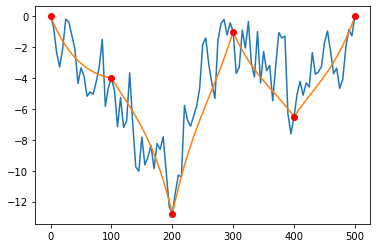

In [27]:
# Calcul d'un profil (en tenant compte de l'incertitude de l'espérance)
def get_simu(Cholesky, Ec):
    x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu = Ec + np.matmul(Cholesky,x)
    return simu

# Génération du couple
def couple(fill=True):
    mu = mu_cond_neg()
    Ec = mu + np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))
    
    Cholesky = np.linalg.cholesky(SigmaCond)
    simu = get_simu(Cholesky,Ec)
    
    while np.any(simu > 0):
        simu = get_simu(Cholesky,Ec)
        
    if (fill):
        allval3 = np.zeros(N)
        allval3[unknown_indexes]=simu
        allval3[observation_indexes]=depth        
        return allval3
    else:
        return simu

plt.plot(discretization,couple())
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()
    

9. Générer 10000 profils de profondeur et calculer les longueurs de câble associées. Comparer la valeur moyenne de la longueur de câble, dont on visualisera la convergence, l'histogramme des longueurs de câble, l'intervalle de confiance obtenu par la méthode des quantiles, la probabilité de dépassement du seuil de 525 m avec les résultats obtenus précédemment. Commenter.

On procède comme à la question 2.

La cellule met quelques secondes à s'exécuter.

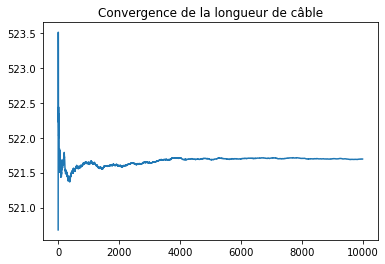

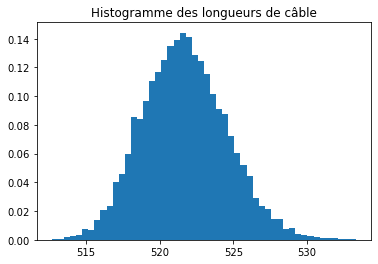

Moyenne (avec rejet et incertitude, avec rejet sans incertitude) 
	 521.694684048438 521.7958238123985
Ecart-type (avec rejet et incertitude, avec rejet sans incertitude) 
	 2.8565750210454364 2.8565517371326403
Intervalle de confiance (avec rejet et incertitude, avec rejet sans incertitude) 
	 [516.42955131 527.56590095] [516.5011172  527.81665731]
Proba (avec rejet et incertitude, avec rejet sans incertitude) 
	 0.1261 0.1333


In [28]:
K=10000

result = np.zeros(K)
for i in range(K):
    allval3[unknown_indexes]=couple(False)
    result[i]=length(allval3,Delta)
Ln3 = sum(result)/K
sigman3 = np.std(result)
ic3 = np.quantile(result,[0.025,0.975])
pm3 = np.mean(result>525)

indice_simu = 1 + np.arange(K)
plt.plot(indice_simu,np.cumsum(result)/indice_simu)
plt.title("Convergence de la longueur de câble")
plt.show()

plt.hist(result,50,density=True)
plt.title("Histogramme des longueurs de câble")
plt.show()

print("Moyenne (avec rejet et incertitude, avec rejet sans incertitude)", "\n\t", Ln3, Ln2)
print("Ecart-type (avec rejet et incertitude, avec rejet sans incertitude)", "\n\t", sigman3, sigman2)
print("Intervalle de confiance (avec rejet et incertitude, avec rejet sans incertitude)", "\n\t", ic3, ic2)
print("Proba (avec rejet et incertitude, avec rejet sans incertitude)", "\n\t", pm3, pm2)

On remarque ainsi :

- une convergence conforme à la loi forte des grands nombres
- pas de variation significative de la moyenne (peut-être encore un peu plus faible)
- on pourrait penser que l'écart-type sera plus important, mais cela ne semble pas être le cas sur un nombre important de tirages : la convergence semble similaire
- l'intervalle de confiance est aussi sensiblement le même, les modiifications ne sont pas aussi importantes que lorsque on a introduit le rejet à la question 1 ; cet intervalle n'est pas plus grand que l'ancien, c'est presque le contraire
- la probabilité est un peu plus faible elle-aussi

10. Qu'adviendrait-il selon vous si on rendait également aléatoires les autres paramètres du modèle $\sigma^2$ et $a$ ?

En rendant aléatoire la variance $\sigma^2$ et la distance caractéristique de la covariance $a$, on observation plus de dispersion : on aurait un plus grand intervalle d'incertitude et probablement une longueur de cable plus importante moyenne plus importante car il y aurait peut-être plus de variations de relief.

Toutefois, cette intuition doit être considérée avec prudence d'après la question 9 : l'écart-type avec $\mu$ aléatoire n'a pratiquement pas augmenté, et il a même baissé pour une proportion importante d'essais.


11. (facultatif) On suppose désormais que $\alpha = \frac1{\sigma^2} \sim \Gamma(a_1,a_2)$, où $\sigma^2$ correspond au paramètre qui intervient dans la fonction $C$. Donner l'expression de la densité de $\alpha | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$,  de $\mu | \alpha, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}},$ et de $\mathbf{Z}_{\text{UNK}} | \mu, \alpha, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$. Proposer un algorithme de simulation tenant compte de l'incertitude sur le paramètre $\alpha$ et analyser son impact sur les différentes quantités évaluées.

    Indication : Pour identifier la densité de $\alpha | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$, exprimer d'abord la densité jointe de $(\alpha,\mu, \mathbf{Z}_{\text{OBS}})$ puis marginaliser pour obtenir la densité de $(\alpha,\mathbf{Z}_{\text{OBS}})$


On suppose l'indépendance entre les variables $\alpha$ et $\mu$. Nous utilisons les conventions de numpy pour la loi gamma et non celles du cours.

Par indépendance, on a :

$f_{\alpha, \mu, Z_{OBS}}(x,y,z) = f_\alpha(x) f_{\mu}(y) f_{Z_{OBS}|\alpha = x, \mu = y}(z)$

On remarque que $C_{OBS}^{cond}(\alpha) = \frac{1}{12\alpha}C_{OBS}$ par définition.

Nous avons mené des calculs au papier qui nous ont permis de trouver $\alpha|Z_{OBS}=z_{OBS}$ à une constante de normalisation près, mais nous n'avons pas eu le temps d'implémenter un algorithme de rejet pour simuler la loi associée à la densité calculée.

On intègre selon $y$ pour obtenir la densité de $(\alpha,\mathbf{Z}_{\text{OBS}})$. On se ramène ensuite à la densité conditionnelle que l'on évalue en $z_{OBS}$.

$f_{\alpha,Z_{OBS}}(x,z)=\frac{1}{2(2\pi)^3}\frac{x^{a_1-1}\exp(-\frac{x}{a_1})}{a_2^{a_1}\Gamma(a_1)}\frac{\widehat{\sigma}(x)}{(\frac{1}{(12x)^6}\det(C_{OBS}))^{1/2}}$



Pour déterminer les paramètres $a_1$ et $a_2$, nous aurions utilisé un algorithme de rejet. On cherche à être centré autour d'$\frac{1}{12}$ pour avoir le même $\sigma^2$ que précédemment en moyenne. On ajuste ensuite la variance de la loi gamma pour avoir des résultats qui restent cohérents (elle est faible car on reste proche de 12).

Pour l'algorithme de simulation, voici un schéma de ce que l'on aurait fait, si on avait eu le temps d'implémenter le calcul de la densité d'$\alpha|Z_{OBS}=z_{OBS}$ : on utilise le même que précédemment, par étapes, sauf que l'on rajoute tout d'abord le tirage de $\alpha$, et l'on modifie les matrices de covariances en conséquent, conformément aux lois identifiées grâces aux densités calculées précédemment.

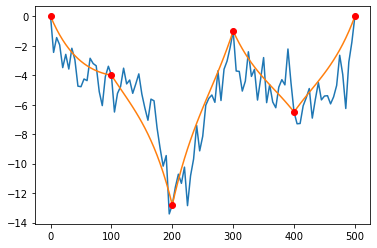

In [149]:
sigma2 = 12
mean = 1/sigma2 # 1/sigma^2
v = 0.0001

a2 = v/mean
a1 = mean/a2

def sigma_bar_carre(alpha, prefacteur):
    calc = np.array(1/prefacteur*np.matmul(np.matmul(attila, np.transpose(np.linalg.inv(cobs))), attila) + 1/4)
    return 1/calc

def mu_bar(alpha, prefacteur):
    scc = sigma_bar_carre(alpha, prefacteur)
    calc = scc * (-5/4+1/prefacteur*np.matmul(np.matmul(attila, np.transpose(np.linalg.inv(cobs))), zobs))
    return calc, scc

def mu_cond_neg_bar(alpha, prefacteur):
    muc, scc = mu_bar(alpha, prefacteur)
    
    x = np.random.normal(muc, scc)
    while (x > 0):
        x = np.random.normal(muc, scc)
    
    return x

def couple_bar(fill=True):
    alpha = np.random.gamma(a1, a2) # attention convention : https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html
    prefacteur = 1/(sigma2*alpha)
    mu = mu_cond_neg_bar(alpha, prefacteur)    
    
    # print(1/alpha, mu, prefacteur)
    
    Ec = mu + np.matmul(np.transpose(prefacteur*SigmaObsUnknown),np.matmul(np.linalg.inv(prefacteur*SigmaObs),depth-mu))    
    Cholesky = np.linalg.cholesky(prefacteur*SigmaCond)
    
    simu = get_simu(Cholesky,Ec)
    
    while np.any(simu > 0):
        simu = get_simu(Cholesky,Ec)
        
    if (fill):
        allval3 = np.zeros(N)
        allval3[unknown_indexes]=simu
        allval3[observation_indexes]=depth        
        return allval3
    else:
        return simu
    

plt.plot(discretization,couple_bar())
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

La cellule ci-dessous met environ 50 sec pour s'exécuter...

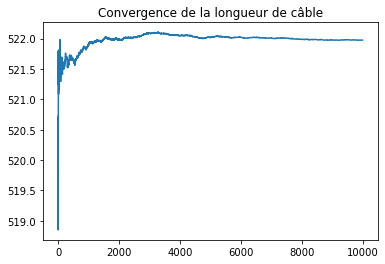

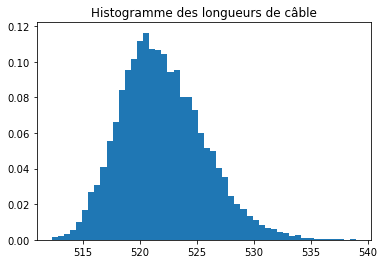

Moyenne (Q9, Q11) 
	 521.6903105214465 521.9749673649
Ecart-type (Q9, Q11) 
	 2.859318053473884 3.670199367618573
Intervalle de confiance (Q9, Q11) 
	 [516.56412289 527.77227513] [515.61062299 529.9559812 ]
Proba (Q9, Q11) 
	 0.1255 0.1977


In [150]:
K=10000

result = np.zeros(K)
for i in range(K):
    allval3[unknown_indexes]=couple_bar(False)
    result[i]=length(allval3,Delta)
    #if (i%1000 == 0):
    #    print(i)
        
Ln4 = sum(result)/K
sigman4 = np.std(result)
ic4 = np.quantile(result,[0.025,0.975])
pm4 = np.mean(result>525)

indice_simu = 1 + np.arange(K)
plt.plot(indice_simu,np.cumsum(result)/indice_simu)
plt.title("Convergence de la longueur de câble")
plt.show()

plt.hist(result,50,density=True)
plt.title("Histogramme des longueurs de câble")
plt.show()

print("Moyenne (Q9, Q11)", "\n\t", Ln3, Ln4)
print("Ecart-type (Q9, Q11)", "\n\t", sigman3, sigman4)
print("Intervalle de confiance (Q9, Q11)", "\n\t", ic3, ic4)
print("Proba (Q9, Q11)", "\n\t", pm3, pm4)

Ici (dans ce cas là, qui n'est pas exactement demandé), on constate, conformément à la question 10, une moyenne qui reste proche mais une augmentation significative de l'écart-type et de l'intervalle de confiance. On a bien rajouté de l'incertitude. Cela se voit également sur la probabilité qui est plus élévée ; l'histogramme est plus étalé. La convergence est peut-être un peu plus longue également.